# 디리클레 프로세스
https://assaeunji.github.io/bayesian/2019-01-06-dp/

목적: 임의의 분포가 디리클레 분포를 따른다.
클러스터의 개수가 고정되지 않는다(?)

# Step1: 기본 라이브러리

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as ss
import seaborn as sns
from statsmodels.datasets import get_rdataset
from theano import tensor as T

# Step2: Stick-breaking process

In [9]:
np.random.seed(433)
N = 20 # N_obs
K = 30 # N_sticks
alpha = 2. # parameter in Beta
H = ss.norm # base dist

In [17]:
beta = ss.beta.rvs(1, alpha, size = (N,K)) # Beta (1,alpha) dist
beta.shape

(20, 30)

In [27]:
origin_mean = 1/(1 + alpha)
origin_var = 1*alpha/((1+alpha)**2 * (1+alpha+1))

print(f"orign_mean:{origin_mean:.3f}, origin_var:{origin_var:.3f}")

orign_mean:0.333, origin_var:0.056


In [29]:
for i in range(beta.shape[0]):
    s_mean = np.mean(beta[i])
    s_var = np.var(beta[i])
    print(f"sample_mean:{s_mean:.3f}, sample_var:{s_var:.3f}")

sample_mean:0.307, sample_var:0.068
sample_mean:0.297, sample_var:0.046
sample_mean:0.371, sample_var:0.059
sample_mean:0.309, sample_var:0.036
sample_mean:0.361, sample_var:0.060
sample_mean:0.356, sample_var:0.063
sample_mean:0.319, sample_var:0.042
sample_mean:0.450, sample_var:0.062
sample_mean:0.375, sample_var:0.061
sample_mean:0.362, sample_var:0.044
sample_mean:0.298, sample_var:0.040
sample_mean:0.278, sample_var:0.063
sample_mean:0.339, sample_var:0.067
sample_mean:0.322, sample_var:0.046
sample_mean:0.302, sample_var:0.042
sample_mean:0.329, sample_var:0.065
sample_mean:0.384, sample_var:0.072
sample_mean:0.388, sample_var:0.053
sample_mean:0.399, sample_var:0.076
sample_mean:0.351, sample_var:0.060


In [33]:
pi = np.empty_like(beta)
np.round(pi,4)

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.   

In [35]:
pi[:, 0] = beta[:,0]
pi

array([[0.16496232, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.17703172, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1056795 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

π1 = β1

πr = βr⋅∏(1−βi), r=2,⋯,K

In [48]:
pi[:, 1:] = beta[:, 1:] * (1-beta[:, :-1]).cumprod(axis=1) # 누적곱
pi

array([[1.64962323e-01, 3.75124369e-01, 2.60923549e-01, 7.66222802e-03,
        2.53290158e-02, 1.42278434e-02, 4.97168820e-03, 9.77243222e-02,
        4.15125260e-03, 1.42869350e-02, 1.11634603e-03, 1.12127468e-02,
        1.94463194e-03, 1.61786923e-02, 6.19510599e-05, 7.78786851e-05,
        5.09980996e-06, 9.30431338e-06, 3.11052769e-06, 5.30188166e-06,
        1.51032832e-05, 2.60399519e-06, 2.57145313e-06, 2.64447596e-07,
        6.73608174e-07, 3.61490141e-09, 3.72004119e-08, 1.72209514e-08,
        3.96694538e-08, 9.12154456e-09],
       [1.77031724e-01, 3.05304271e-01, 2.83472142e-01, 1.47541554e-02,
        5.37526271e-02, 1.56241257e-01, 3.22046564e-04, 1.84320085e-03,
        3.06171377e-03, 1.44971097e-03, 1.73346894e-03, 3.44409114e-04,
        2.01142897e-04, 2.79306223e-04, 2.08927145e-05, 5.89524867e-06,
        3.90220156e-05, 7.72171452e-06, 6.45563505e-05, 2.39370435e-05,
        9.76137171e-06, 1.03176807e-05, 5.74508692e-06, 1.40148457e-05,
        2.74260274e-06,

In [78]:
omega = H.rvs(size = (N,K))
print(f"size = {omega.shape}")
for i in range(omega.shape[0]):
    s_mean = np.mean(omega[i])
    s_var = np.var(omega[i])
    print(f"sample_mean:{s_mean:.3f}, sample_var:{s_var:.3f}")

size = (20, 30)
sample_mean:0.119, sample_var:1.099
sample_mean:0.357, sample_var:0.837
sample_mean:-0.083, sample_var:1.024
sample_mean:-0.252, sample_var:0.829
sample_mean:-0.159, sample_var:0.648
sample_mean:0.002, sample_var:1.080
sample_mean:0.053, sample_var:0.913
sample_mean:0.027, sample_var:0.911
sample_mean:0.135, sample_var:1.077
sample_mean:0.081, sample_var:0.493
sample_mean:-0.277, sample_var:0.659
sample_mean:0.081, sample_var:1.378
sample_mean:0.072, sample_var:0.991
sample_mean:-0.021, sample_var:0.627
sample_mean:0.161, sample_var:1.025
sample_mean:-0.111, sample_var:0.911
sample_mean:0.019, sample_var:1.745
sample_mean:-0.157, sample_var:0.686
sample_mean:0.124, sample_var:0.800
sample_mean:-0.092, sample_var:0.979


# Step3: plot그리기

In [52]:
x_plot = np.linspace(-3,3,200)            
x_plot

array([-3.        , -2.96984925, -2.93969849, -2.90954774, -2.87939698,
       -2.84924623, -2.81909548, -2.78894472, -2.75879397, -2.72864322,
       -2.69849246, -2.66834171, -2.63819095, -2.6080402 , -2.57788945,
       -2.54773869, -2.51758794, -2.48743719, -2.45728643, -2.42713568,
       -2.39698492, -2.36683417, -2.33668342, -2.30653266, -2.27638191,
       -2.24623116, -2.2160804 , -2.18592965, -2.15577889, -2.12562814,
       -2.09547739, -2.06532663, -2.03517588, -2.00502513, -1.97487437,
       -1.94472362, -1.91457286, -1.88442211, -1.85427136, -1.8241206 ,
       -1.79396985, -1.7638191 , -1.73366834, -1.70351759, -1.67336683,
       -1.64321608, -1.61306533, -1.58291457, -1.55276382, -1.52261307,
       -1.49246231, -1.46231156, -1.4321608 , -1.40201005, -1.3718593 ,
       -1.34170854, -1.31155779, -1.28140704, -1.25125628, -1.22110553,
       -1.19095477, -1.16080402, -1.13065327, -1.10050251, -1.07035176,
       -1.04020101, -1.01005025, -0.9798995 , -0.94974874, -0.91

In [61]:
pi[..., np.newaxis].shape

(20, 30, 1)

In [77]:
omega.shape

(20, 30)

In [66]:
print(np.less.outer(omega, x_plot).shape)
a = np.less.outer(omega, x_plot)
a

(20, 30, 200)


array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  Tr

In [75]:
sum(a[0,0,:])

87

In [74]:
sum(t[0,0,:] != 0)

87

In [71]:
sum(a[0,1,:])

69

In [73]:
sum(t[0,1,:] != 0)

69

In [64]:
t = (pi[..., np.newaxis]* np.less.outer(omega, x_plot))
print(t.shape)
t

(20, 30, 200)


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.64962323e-01, 1.64962323e-01, 1.64962323e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.75124369e-01, 3.75124369e-01, 3.75124369e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.60923549e-01, 2.60923549e-01, 2.60923549e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.72209514e-08, 1.72209514e-08, 1.72209514e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.96694538e-08, 3.96694538e-08, 3.96694538e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.12154456e-09, 9.12154456e-09, 9.12154456e-09]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.77031724e-01, 1.77031724e-01, 1.77031724e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.05304271e-01, 3.05304271e-01, 3.05304271e-01],
        [0.00000000e+00, 

In [59]:
(pi[..., np.newaxis]* np.less.outer(omega, x_plot)).shape

(20, 30, 1)

In [83]:
sample_cdfs = (pi[..., np.newaxis]* np.less.outer(omega, x_plot)).sum(axis=1)
print(sample_cdfs.shape)
sample_cdfs

(20, 200)


array([[0.        , 0.        , 0.        , ..., 0.99999991, 0.99999991,
        0.99999991],
       [0.        , 0.        , 0.        , ..., 0.99998421, 0.99998421,
        0.99998421],
       [0.        , 0.        , 0.        , ..., 0.99999995, 0.99999995,
        0.99999995],
       ...,
       [0.        , 0.        , 0.        , ..., 0.99999997, 0.99999997,
        0.99999997],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.99999985, 0.99999985,
        0.99999985]])

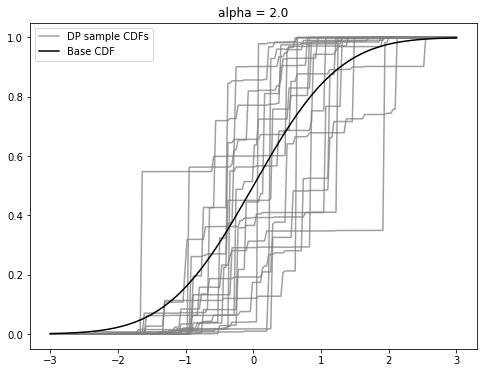

In [85]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(x_plot, sample_cdfs[0], c = "gray", alpha = 0.75, label = "DP sample CDFs")
ax.plot(x_plot, sample_cdfs[1:].T, c = "gray", alpha = 0.75)
ax.plot(x_plot, H.cdf(x_plot), c = "k", label = "Base CDF")

ax.set_title(f"alpha = {alpha}")
ax.legend(loc = 2)